## Persistence Images: A Stable Vector Representation of Persistent Homology

### Implementation on MNIST

https://arxiv.org/pdf/1507.06217.pdf

**Reference**: https://gitlab.com/csu-tda/PersistenceImages

`pip install --user PersistenceImages`

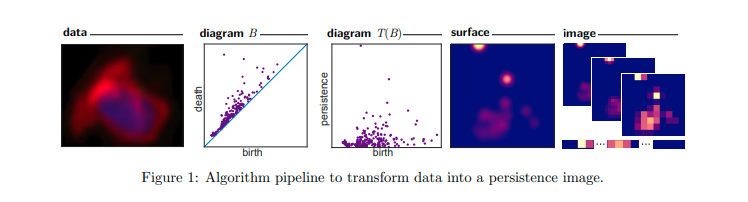

## MNIST

In [1]:
import pickle
x_train,y_train,x_test,y_test=pickle.load(open("mnist_filtrations.pckl","rb"))

In [2]:
import PersistenceImages.persistence_images as pimg

In [3]:
pers_imager = pimg.PersistenceImager()

In [5]:
per_imgs=[]
from tqdm import tqdm
import numpy as np
for filt in tqdm(x_train):
    per_imgs.append(pers_imager.fit_transform(filt, skew=True))
    

per_imgs=np.transpose(per_imgs,[1,0,2,3]).reshape(-1,31*5*5)

per_imgs_test=[]
for filt in tqdm(x_test):
    per_imgs_test.append(pers_imager.fit_transform(filt, skew=True))
per_imgs_test=np.transpose(np.array(per_imgs_test),[1,0,2,3]).reshape(-1,31*5*5)



100%|██████████| 31/31 [02:48<00:00,  5.44s/it]


In [6]:
from sklearn.svm import SVC
s=SVC(verbose=True).fit(per_imgs,y_train)

[LibSVM]

In [ ]:
s.score(per_imgs_1_test,y_test)

## FMNIST

In [ ]:
from main import get_data_images

x_train_fmnist, y_train_fmnist, x_test_fmnist, y_test_fmnist = pickle.load(open("fmnist_filtrations.pckl","rb"))


In [ ]:
pers_imager = pimg.PersistenceImager()
per_imgs=[]
from tqdm import tqdm

for filt in tqdm(x_train_fmnist):
    per_imgs.append(pers_imager.fit_transform(filt, skew=True))
per_imgs=np.array(per_imgs).reshape(-1,1*5*5)


x_per_imgs_test=[]
for filt in tqdm(x_test_fmnist):
    x_per_imgs_test.append(pers_imager.fit_transform(filt, skew=True))
x_per_imgs_test=np.array(x_per_imgs_test).reshape(-1,1*5*5)

In [ ]:

from sklearn.svm import SVC
s=SVC(verbose=True).fit(x_per_imgs,y_train_fmnist)

In [ ]:
s.score(x_per_imgs_test,y_test_fmnist)